In [114]:
import pandas as pd
from pandas import DataFrame, read_csv
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import math
import statistics

In [143]:
def readData(csv_file):
    column_names = ['AirName','AircraftModel','Comments','DateFlown','EntertainmentRating',
     'FoodRating','FullReview','GroundServiceRating','OverallScore',
     'Recommended','ReviewDate','ReviewTitle','ReviewrCountry','Route',
     'SeatComfortRating','SeatType','ServiceRating','TravelType','ValueRating',
     'Verified','WifiRating']
    return pd.read_csv(csv_file,header = None,names = column_names)
jetblue_df = readData('JetBlue.csv')
united_df = readData('United.csv')
delta_df = readData('Delta.csv')
southwest_df = readData('Southwest.csv')

all_dfs = [jetblue_df, united_df, delta_df, southwest_df]

Airline: Jet Blue
Average Sentiment: 0.030364372469635626
Average Score: 4.8053977272727275
Score STD: 3.7938220890784353
Airline: United
Average Sentiment: -0.16483516483516483
Average Score: 2.904
Score STD: 2.8912182800928647
Airline: Delta
Average Sentiment: -0.07992007992007992
Average Score: 3.802
Score STD: 3.4520591989003773
Airline: Southwest
Average Sentiment: -0.01998001998001998
Average Score: 5.040339702760085
Score STD: 3.746832469005231


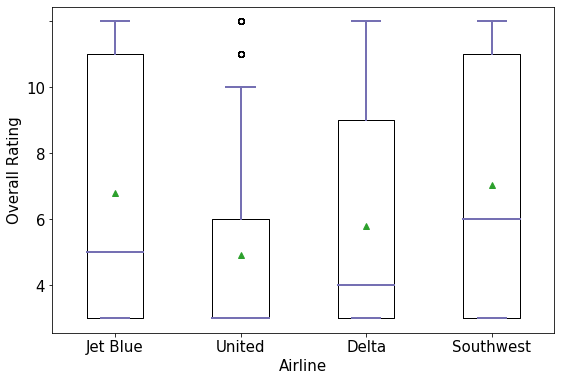

In [301]:
def analyzeSentiment(statement):
    analysis = TextBlob(statement) 
    if analysis.sentiment.polarity > 0: 
        return 1
    elif analysis.sentiment.polarity == 0: 
        return 0
    else: 
        return -1
data_to_plot = []
for df in all_dfs:
    print("Airline: " + str(df['AirName'][1]))
    sentiment_array = []
    for index, row in df.iterrows():
        review_title = row['ReviewTitle']
        #print(review_title)
        if(review_title != "Jetblue Airways customer review"):
            sentiment = analyzeSentiment(review_title)
            sentiment_array.append(sentiment)

    print("Average Sentiment: " + str(sum(sentiment_array)/len(sentiment_array)))

    score_array = []
    for index, row in df.iterrows():
        overall_score = row['OverallScore']
        try:
            score_array.append(int(overall_score))
        except:
            pass
    print("Average Score: " + str(sum(score_array)/len(score_array)))
    print("Score STD: " + str(statistics.stdev(score_array)))
    
    data_to_plot.append(score_array)
    
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
ax.set_xticklabels(['Jet Blue', 'United', 'Delta', 'Southwest'], fontsize=15)
ax.set_yticklabels([2, 4, 6, 8, 10], fontsize=15)

plt.xlabel('Airline', fontsize=15)
plt.ylabel('Overall Rating', fontsize=15)

# Create the boxplot
bp = ax.boxplot(data_to_plot, showmeans=True)

for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#7570b3', linewidth=2)

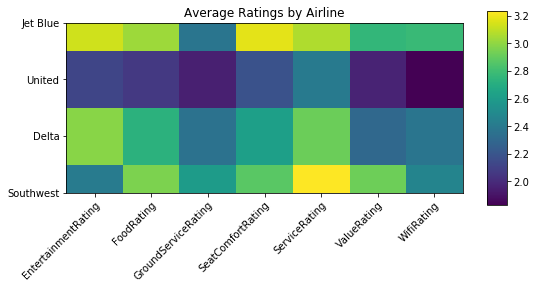

In [300]:
categories = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 
              'ServiceRating', 'ValueRating', 'WifiRating']
airlines = ['Jet Blue', 'United', 'Delta', 'Southwest']

heatmap = []

for i in range(len(all_dfs)):
    df = all_dfs[i]
    value_array = [0 for x in range(0, len(categories))]
    counter_array = [0 for x in range(0, len(categories))]
    for index, row in df.iterrows():
        for j in range(0, len(categories)):
            #print(j,categories[j])
            #print(row[categories[j]])
            if(index > 0 and not math.isnan(float(row[categories[j]]))):
                if(int(row[categories[j]])!= 0):
                    value_array[j] += int(row[categories[j]])
                    counter_array[j] += 1
    heatmap.append([value_array[x]/counter_array[x] for x in range(len(categories))])

fig, ax = plt.subplots()
im = ax.imshow(np.array(heatmap))
ax.set_xticks(np.arange(len(categories)))
ax.set_yticks(np.arange(len(airlines)))
ax.set_xticklabels(categories)
ax.set_yticklabels(airlines)

cbar = ax.figure.colorbar(im, fraction = 0.15, ax=ax, shrink = 0.35, aspect = 10)
cbar.ax.set_ylabel("", rotation=-90, va="bottom")
fig.set_figheight(8)
fig.set_figwidth(8)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.title("Average Ratings by Airline")
fig.tight_layout()
plt.show()

[0, 0, 1, 1, 2, 4, 12, 9, 8, 5, 10, 3, 5, 8, 11, 6, 5, 8, 5, 6, 2, 1, 6, 7, 9, 6, 1, 8, 15, 13, 16, 20, 10, 7, 10, 5, 8, 3, 11, 15, 9, 18, 16, 17, 7, 10, 12, 6, 9, 7, 12, 14, 8, 23, 19, 23, 15, 13, 0, 0]


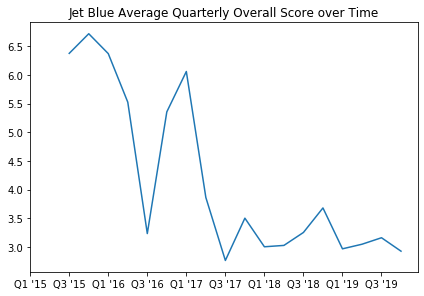

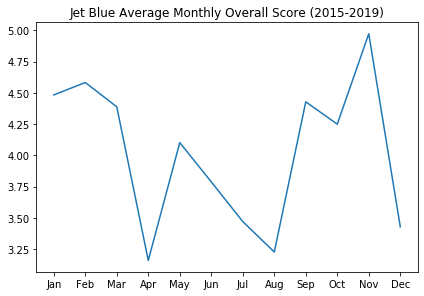

[31, 24, 36, 44, 39, 66, 68, 75, 42, 36, 38, 21]


In [317]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
years = ['15', '16', '17', '18', '19']
def parse_date(date):
    arr = date.split("-")
    year = int(arr[1])-15
    month = months.index(arr[0])
    return year*12+month

x = [i for i in range(12*5)]
x_label = [months[i]+"-"+years[j] for j in range(5) for i in range(12)]
y = [0 for i in range(12*5)]
counter = [0 for i in range(12*5)]
for index, row in jetblue_df.iterrows():
    #print(row['DateFlown'])
    if(index > 0 and not pd.isnull(jetblue_df.loc[index, 'DateFlown']) and len(row['DateFlown']) > 0):
        time = parse_date(row['DateFlown'])
        y[time] += int(row['OverallScore'])
        counter[time] += 1
print(counter)

        
        
x_fin = ['Q1 \'15', 'Q3 \'15', 
          'Q1 \'16', 'Q3 \'16', 
          'Q1 \'17', 'Q3 \'17', 
          'Q1 \'18',  'Q3 \'18', 
          'Q1 \'19', 'Q3 \'19'] 

y_final = [y[0+i*3]+y[1+i*3]+y[2+i*3] for i in range(4*5)]
counter_final = [counter[0+i*3]+counter[1+i*3]+counter[2+i*3] for i in range(4*5)]

y_fin = np.array([])
for i in range(4*5):
    if(counter[i] != 0):
        y_fin = np.append(y_fin, np.array([y_final[i]/counter_final[i]]))
    else:
        y_fin = np.append(y_fin, np.array([np.nan]))


x = [i for i in range(20)]        
        
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y_fin)
plt.xticks(np.arange(min(x), max(x)+1, 2))
ax.set_xticklabels(x_fin)
fig.tight_layout()
plt.title("Jet Blue Average Quarterly Overall Score over Time")
plt.show()

x = [i for i in range(12)]
x_label = [months[i] for i in range(12)]
y = [0 for i in range(12)]
counter = [0 for i in range(12)]
for index, row in jetblue_df.iterrows():
    if(index > 0 and not pd.isnull(jetblue_df.loc[index, 'DateFlown']) and len(row['DateFlown']) > 0):
        time = parse_date(row['DateFlown'])
        y[time%12] += int(row['OverallScore'])
        counter[time%12] += 1
        
y_fin = np.array([])
for i in range(12):
    if(counter[i] != 0):
        y_fin = np.append(y_fin, np.array([y[i]/counter[i]]))
    else:
        y_fin = np.append(y_fin, np.array([np.nan]))

fig = plt.figure()
ax = plt.axes()
ax.plot(x, y_fin)
plt.xticks(np.arange(min(x), max(x)+1, 1))
x_fin = [x_label[i] for i in range(0, len(x_label))]
ax.set_xticklabels(x_fin)
fig.tight_layout()
plt.title("Jet Blue Average Monthly Overall Score (2015-2019)")
plt.show()
print(counter)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 13, 25, 27, 10, 15, 13, 22, 17, 9, 16, 15, 24, 18, 27, 23, 15, 29, 13, 22, 20, 11, 27, 27, 43, 34, 31, 39, 17, 30, 38, 24, 24, 26, 31, 27, 37, 33, 23, 53, 25, 24, 0, 0]


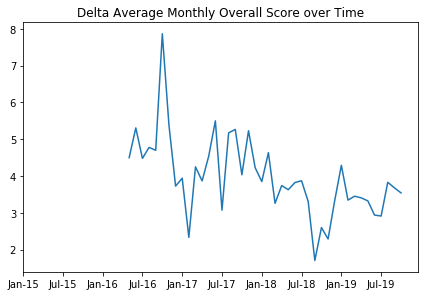

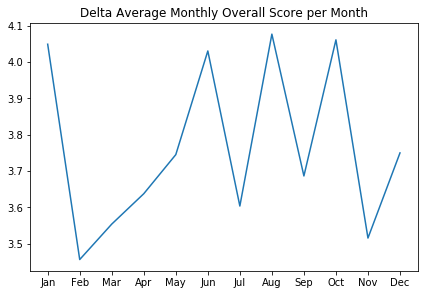

[61, 46, 74, 69, 106, 98, 106, 143, 67, 98, 64, 68]


In [139]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
years = ['15', '16', '17', '18', '19']
def parse_date(date):
    arr = date.split("-")
    year = int(arr[1])-15
    month = months.index(arr[0])
    return year*12+month

x = [i for i in range(12*5)]
x_label = [months[i]+"-"+years[j] for j in range(5) for i in range(12)]
y = [0 for i in range(12*5)]
counter = [0 for i in range(12*5)]
for index, row in delta_df.iterrows():
    #print(row['DateFlown'])
    if(index > 0 and not pd.isnull(delta_df.loc[index, 'DateFlown']) and len(row['DateFlown']) > 0):
        time = parse_date(row['DateFlown'])
        y[time] += int(row['OverallScore'])
        counter[time] += 1
print(counter)        
y_fin = np.array([])
for i in range(12*5):
    if(counter[i] != 0):
        y_fin = np.append(y_fin, np.array([y[i]/counter[i]]))
    else:
        y_fin = np.append(y_fin, np.array([np.nan]))

fig = plt.figure()
ax = plt.axes()
ax.plot(x, y_fin)
plt.xticks(np.arange(min(x), max(x)+1, 6))
x_fin = [x_label[i*6] for i in range(0, len(x_label)//6)]
ax.set_xticklabels(x_fin)
fig.tight_layout()
plt.title("Delta Average Monthly Overall Score over Time")
plt.show()

x = [i for i in range(12)]
x_label = [months[i] for i in range(12)]
y = [0 for i in range(12)]
counter = [0 for i in range(12)]
for index, row in delta_df.iterrows():
    if(index > 0 and not pd.isnull(delta_df.loc[index, 'DateFlown']) and len(row['DateFlown']) > 0):
        time = parse_date(row['DateFlown'])
        y[time%12] += int(row['OverallScore'])
        counter[time%12] += 1
        
y_fin = np.array([])
for i in range(12):
    if(counter[i] != 0):
        y_fin = np.append(y_fin, np.array([y[i]/counter[i]]))
    else:
        y_fin = np.append(y_fin, np.array([np.nan]))

fig = plt.figure()
ax = plt.axes()
ax.plot(x, y_fin)
plt.xticks(np.arange(min(x), max(x)+1, 1))
x_fin = [x_label[i] for i in range(0, len(x_label))]
ax.set_xticklabels(x_fin)
fig.tight_layout()
plt.title("Delta Average Monthly Overall Score per Month")
plt.show()
print(counter)

[0, 0, 1, 1, 5, 11, 19, 26, 17, 15, 21, 22, 10, 7, 14, 5, 11, 12, 11, 9, 15, 7, 4, 19, 6, 4, 10, 13, 7, 10, 21, 12, 9, 11, 14, 16, 19, 9, 21, 9, 20, 21, 31, 17, 19, 17, 17, 24, 17, 17, 21, 22, 20, 19, 18, 22, 17, 18, 0, 1]


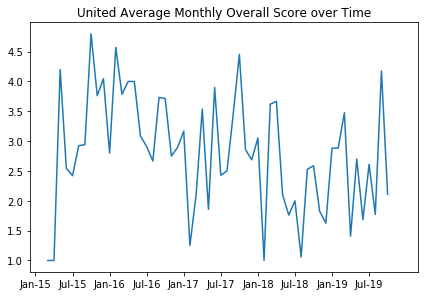

[52, 37, 67, 50, 63, 73, 100, 86, 77, 68, 56, 82]


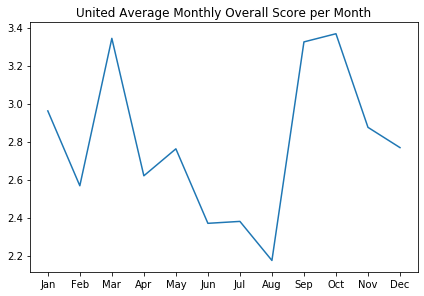

[52, 37, 67, 50, 63, 73, 100, 86, 77, 68, 56, 82]


In [146]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
years = ['15', '16', '17', '18', '19']
def parse_date(date):
    arr = date.split("-")
    year = int(arr[1])-15
    month = months.index(arr[0])
    return year*12+month

x = [i for i in range(12*5)]
x_label = [months[i]+"-"+years[j] for j in range(5) for i in range(12)]
y = [0 for i in range(12*5)]
counter = [0 for i in range(12*5)]
for index, row in united_df.iterrows():
    if(index > 0 and not pd.isnull(united_df.loc[index, 'DateFlown']) and len(row['DateFlown']) > 0):
        time = parse_date(row['DateFlown'])
        y[time] += int(row['OverallScore'])
        counter[time] += 1
print(counter)        
y_fin = np.array([])
for i in range(12*5):
    if(counter[i] != 0):
        y_fin = np.append(y_fin, np.array([y[i]/counter[i]]))
    else:
        y_fin = np.append(y_fin, np.array([np.nan]))

fig = plt.figure()
ax = plt.axes()
ax.plot(x, y_fin)
plt.xticks(np.arange(min(x), max(x)+1, 6))
x_fin = [x_label[i*6] for i in range(0, len(x_label)//6)]
ax.set_xticklabels(x_fin)
fig.tight_layout()
plt.title("United Average Monthly Overall Score over Time")
plt.show()

x = [i for i in range(12)]
x_label = [months[i] for i in range(12)]
y = [0 for i in range(12)]
counter = [0 for i in range(12)]
for index, row in united_df.iterrows():
    if(index > 0 and not pd.isnull(united_df.loc[index, 'DateFlown']) and len(row['DateFlown']) > 0):
        time = parse_date(row['DateFlown'])
        y[time%12] += int(row['OverallScore'])
        counter[time%12] += 1
print(counter)        
y_fin = np.array([])
for i in range(12):
    if(counter[i] != 0):
        y_fin = np.append(y_fin, np.array([y[i]/counter[i]]))
    else:
        y_fin = np.append(y_fin, np.array([np.nan]))

fig = plt.figure()
ax = plt.axes()
ax.plot(x, y_fin)
plt.xticks(np.arange(min(x), max(x)+1, 1))
x_fin = [x_label[i] for i in range(0, len(x_label))]
ax.set_xticklabels(x_fin)
fig.tight_layout()
plt.title("United Average Monthly Overall Score per Month")
plt.show()
print(counter)

[1, 0, 0, 2, 2, 6, 20, 13, 7, 13, 13, 19, 7, 2, 13, 14, 4, 3, 7, 7, 5, 13, 10, 9, 4, 6, 10, 6, 10, 7, 9, 6, 10, 4, 9, 10, 14, 9, 22, 15, 29, 20, 22, 16, 15, 15, 14, 18, 10, 15, 22, 18, 16, 25, 16, 22, 12, 25, 0, 0]


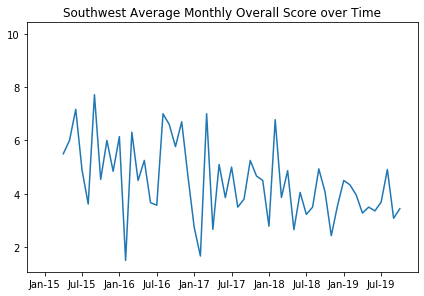

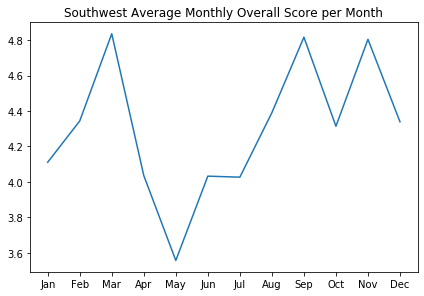

[36, 32, 67, 55, 61, 61, 74, 64, 49, 70, 46, 56]


In [130]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
years = ['15', '16', '17', '18', '19']
def parse_date(date):
    arr = date.split("-")
    year = int(arr[1])-15
    month = months.index(arr[0])
    return year*12+month

x = [i for i in range(12*5)]
x_label = [months[i]+"-"+years[j] for j in range(5) for i in range(12)]
y = [0 for i in range(12*5)]
counter = [0 for i in range(12*5)]
for index, row in southwest_df.iterrows():
    #print(row['DateFlown'])
    if(index > 0 and not pd.isnull(southwest_df.loc[index, 'DateFlown']) and len(row['DateFlown']) > 0):
        time = parse_date(row['DateFlown'])
        y[time] += int(row['OverallScore'])
        counter[time] += 1
print(counter)
y_fin = np.array([])
for i in range(12*5):
    if(counter[i] != 0):
        y_fin = np.append(y_fin, np.array([y[i]/counter[i]]))
    else:
        y_fin = np.append(y_fin, np.array([np.nan]))

fig = plt.figure()
ax = plt.axes()
ax.plot(x, y_fin)
plt.xticks(np.arange(min(x), max(x)+1, 6))
x_fin = [x_label[i*6] for i in range(0, len(x_label)//6)]
ax.set_xticklabels(x_fin)
fig.tight_layout()
plt.title("Southwest Average Monthly Overall Score over Time")
plt.show()

x = [i for i in range(12)]
x_label = [months[i] for i in range(12)]
y = [0 for i in range(12)]
counter = [0 for i in range(12)]
for index, row in southwest_df.iterrows():
    if(index > 0 and not pd.isnull(southwest_df.loc[index, 'DateFlown']) and len(row['DateFlown']) > 0):
        time = parse_date(row['DateFlown'])
        y[time%12] += int(row['OverallScore'])
        counter[time%12] += 1
        
y_fin = np.array([])
for i in range(12):
    if(counter[i] != 0):
        y_fin = np.append(y_fin, np.array([y[i]/counter[i]]))
    else:
        y_fin = np.append(y_fin, np.array([np.nan]))

fig = plt.figure()
ax = plt.axes()
ax.plot(x, y_fin)
plt.xticks(np.arange(min(x), max(x)+1, 1))
x_fin = [x_label[i] for i in range(0, len(x_label))]
ax.set_xticklabels(x_fin)
fig.tight_layout()
plt.title("Southwest Average Monthly Overall Score per Month")
plt.show()
print(counter)

In [178]:
airport_codes = {"ATL": "Atlanta", "AUS": "Austin", "BWI": "Baltimore", "BOS":"Boston", 
                "CTL": "Charlotte", "ORD": "Chicago", "CVG": "Chicago", "CLE": "Cleveland",
                 "CMH": "Columbus", "DFW": "Dallas", "DEN": "Denver", "DTW": "Detroit",
                 "FLL": "Fort Laauderdale", "RSW": "Fort Myers", "BDL": "Bradley International",
                 "HNL": "Honolulu", "IAH": "Houston", "HOU": "Houston", "IND": "Indianapolis",
                 "MCI": "Kansas City", "LAS": "Las Vegas", "LAX": "Los Angeles", "MEM": "Memphis",
                 "MIA": "Miami", "MSP": "Minneapolis", "BNA": "Nashville", "MSY": "New Orleans", 
                 "JFK": "New York", "LGA": "New York", "EWR": "Newark", "OAK": "Oakland",
                 "ONT": "Ontario International", "MCO": "Orlando", "PHL": "Philadelphia", 
                 "PHX": "Pheonix", "PIT": "Pittsburgh", "PDX": "Portland", "RDU": "Raleigh-Durham",
                 "SMF": "Sacramento", "SLC": "Salt Lake City", "SAT": "San Antonio", "SAN": "San Diego",
                 "SFO": "San Francisco", "SJC": "San Jose", "SNA": "Santa Ana", "SEA": "Seattle",
                 "STL": "St. Louis", "TPA": "Tampa", "IAD": "DC", "DCA": "DC", "Washington DC": "DC", 
                 "New York JFK": "New York", "New York LGA": "New York", "Washington": "DC", 
                 "Baltimore Washington": "Baltimore", "Washington Dulles": "Washington",
                 "New York (JFK)": 'New York'
                }

In [319]:
airport_codes_keys = airport_codes.keys()
airport_codes_vals = airport_codes.values()

meta_average_score = {}
#meta_counter = {}
for a in range(len(all_dfs)):
    df = all_dfs[a]
    average_start_score_dict = {}

    for index, row in df.iterrows():
        route = row['Route']
        #print(route)
        start = ""
        destination = ""

        if(index > 0 and not pd.isnull(df.loc[index, 'Route'])):

            if("from" in route):
                arr_strings = route.split(" from ")
                destination = arr_strings[0].strip()
                start = arr_strings[0]
                start = start.split(" via ")[0].strip()
            elif("to" in route):
                arr_strings = route.split(" to ")
                #print(arr_strings)
                destination = arr_strings[1]
                destination = destination.split(" via ")[0].strip()
                start = arr_strings[0].strip()

            #print(start, destination)

            if(start in airport_codes_keys):
                start = airport_codes[start]
            if(destination in airport_codes_keys):
                destination = airport_codes[destination]

            if(start in average_start_score_dict.keys()): 
                average_start_score_dict[start].append(int(row['GroundServiceRating'])) 
            else:
                average_start_score_dict[start] = [int(row['GroundServiceRating'])]
    
    for i in set(average_start_score_dict.keys()):
        value = sum(average_start_score_dict[i])/len(average_start_score_dict[i])
        
        #if(len(average_start_score_dict[i]) < 3):
            
        #else:
            #value = -1.0
        
        if(i in meta_average_score.keys() and a == 0):
            meta_average_score[i] = [value]
            meta_counter[i] = [len(average_start_score_dict[i])]
        elif(i in meta_average_score.keys() and a != 0):
            meta_average_score[i].append(value)
            meta_counter[i].append(len(average_start_score_dict[i]))                   
        elif(i not in meta_average_score.keys()):
            if(a == 0):
                meta_average_score[i] = [value]
                meta_counter[i] = [len(average_start_score_dict[i])]
            elif(a == 1):
                meta_average_score[i] = [-1.0, value]
                meta_counter[i] = [-1.0, len(average_start_score_dict[i])]
            elif(a == 2):
                meta_average_score[i] = [-1.0, -1.0, value]
                meta_counter[i] = [-1.0, -1.0, len(average_start_score_dict[i])]
            else:
                meta_average_score[i] = [-1.0, -1.0, -1.0, value]
                meta_counter[i] = [-1.0, -1.0, -1.0, len(average_start_score_dict[i])]
                                   
    for i in set(meta_average_score.keys()):
        if(i not in average_start_score_dict.keys()):
            meta_average_score[i].append(-1.0)
            meta_counter[i].append(-1)
             
for i in meta_average_score.keys():
    if(meta_average_score[i].count(-1.0) < 2):
        print(i)
        print(meta_average_score[i])
        print(meta_counter[i])
            
    #for i in average_start_score_dict.keys():
        #if(len(average_start_score_dict[i]) > 3):
            #print("" + str(i) + ".\t Average: " + str(sum(average_start_score_dict[i])/len(average_start_score_dict[i])) + 
            #      "\t STD: " + str(statistics.stdev(average_start_score_dict[i])) + "\t Samples:" +
            #      str(average_start_score_dict_counter[i]))

RNO
[2.0, 4.0, 1.0, 4.0]
[2, 1, 1, 5]
Sacramento
[2.5, 1.0, 2.75, 2.25]
[2, 2, 4, 8]
DC
[2.142857142857143, 2.5588235294117645, 2.6, 2.8]
[14, 34, 15, 5]
Newark
[1.5555555555555556, 1.9193548387096775, 3.8333333333333335, 2.3333333333333335]
[9, 62, 6, 6]
Charleston
[2.6666666666666665, 1.0, 2.6666666666666665, 2.5]
[3, 2, 3, 2]
Nashville
[1.0, 2.0, 2.6, 3.3846153846153846]
[2, 4, 5, 13]
Raleigh-Durham
[2.25, 2.5, 2.0, -1.0]
[4, 2, 3, -1]
Seattle
[2.75, 1.5, 2.4565217391304346, 2.6666666666666665]
[4, 14, 46, 6]
Orlando
[2.2142857142857144, 2.5454545454545454, 1.6923076923076923, 2.90625]
[42, 11, 13, 32]
New York
[2.3838383838383836, 2.5, 2.3529411764705883, 1.0]
[99, 4, 68, 5]
Oakland
[1.0, -1.0, 1.5, 2.5833333333333335]
[1, -1, 2, 12]
Salt Lake City
[2.8181818181818183, 1.6, 2.1052631578947367, 3.2]
[11, 5, 19, 10]
ROC
[5.0, 2.0, -1.0, 5.0]
[1, 1, -1, 1]
Portland
[2.142857142857143, 1.3, 1.6, 2.5555555555555554]
[7, 10, 10, 9]
ABQ
[4.5, -1.0, 1.5, 2.0]
[2, -1, 2, 1]
Rochester
[5.0, 

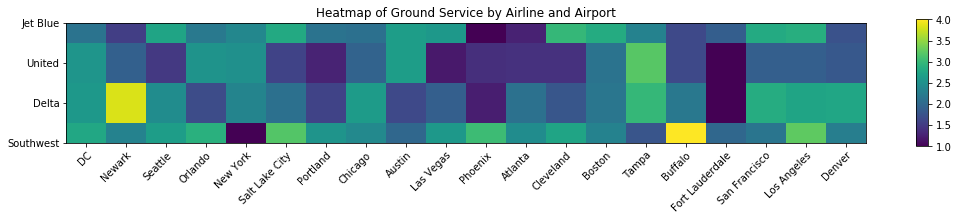

In [321]:
airports = []
airlines = ['Jet Blue', 'United', 'Delta', 'Southwest']

heatmap = []

for i in meta_average_score.keys():
    if(all(j >= 3 for j in meta_counter[i])):
        heatmap.append(meta_average_score[i])
        airports.append(i)

heatmap = list(map(list, zip(*heatmap)))        

fig, ax = plt.subplots()
im = ax.imshow(np.array(heatmap))
ax.set_xticks(np.arange(len(airports)))
ax.set_yticks(np.arange(len(airlines)))
ax.set_xticklabels(airports)
ax.set_yticklabels(airlines)

fig.set_figheight(15)
fig.set_figwidth(15)

cbar = ax.figure.colorbar(im, fraction = 0.15, ax=ax, shrink = 0.12, aspect = 10)
cbar.ax.set_ylabel("", rotation=-90, va="bottom")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.title("Heatmap of Ground Service by Airline and Airport")
fig.tight_layout()
plt.show()

In [261]:
df = jetblue_df

new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header
df = df[['EntertainmentRating','FoodRating','GroundServiceRating',
 'OverallScore','SeatComfortRating',
 'ServiceRating','ValueRating','WifiRating']]
df = df.dropna()
df = df.apply(pd.to_numeric)
df.corr(method ='pearson')

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating
0,,,,,,,,
EntertainmentRating,1.000000,0.770817,0.287193,0.574695,0.704335,0.687186,0.635481,0.429205
FoodRating,0.770817,1.000000,0.353139,0.621282,0.736727,0.761015,0.672258,0.384302
GroundServiceRating,0.287193,0.353139,1.000000,0.341340,0.394675,0.411274,0.390292,0.630932
OverallScore,0.574695,0.621282,0.341340,1.000000,0.591649,0.634913,0.857753,0.216762
SeatComfortRating,0.704335,0.736727,0.394675,0.591649,1.000000,0.781950,0.687878,0.324216
ServiceRating,0.687186,0.761015,0.411274,0.634913,0.781950,1.000000,0.681013,0.336375
ValueRating,0.635481,0.672258,0.390292,0.857753,0.687878,0.681013,1.000000,0.268326
WifiRating,0.429205,0.384302,0.630932,0.216762,0.324216,0.336375,0.268326,1.000000


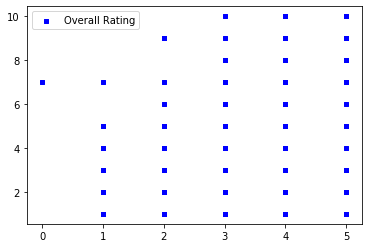

In [282]:

wifi_jetblue = list(df['WifiRating'])
overall_jetblue = list(df['OverallScore'])
value_jetblue = list(df['ValueRating'])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(value_jetblue, overall_jetblue, s=10, c='b', marker="s", label='Overall Rating')
#ax1.scatter(wifi_jetblue,value_jetblue, s=10, c='r', marker="o", label='Value Rating')
plt.legend(loc='upper left');
plt.show()

In [262]:
df = delta_df

new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header
df = df[['EntertainmentRating','FoodRating','GroundServiceRating',
 'OverallScore','SeatComfortRating',
 'ServiceRating','ValueRating','WifiRating']]
df = df.dropna()
df = df.apply(pd.to_numeric)
df.corr(method ='pearson')

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating
0,,,,,,,,
EntertainmentRating,1.000000,0.629654,0.443260,0.469832,0.497498,0.431297,0.447127,0.482424
FoodRating,0.629654,1.000000,0.584122,0.640416,0.619833,0.639039,0.621659,0.410473
GroundServiceRating,0.443260,0.584122,1.000000,0.842060,0.666183,0.655781,0.797803,0.322836
OverallScore,0.469832,0.640416,0.842060,1.000000,0.722224,0.708812,0.913768,0.335510
SeatComfortRating,0.497498,0.619833,0.666183,0.722224,1.000000,0.718973,0.717673,0.321001
ServiceRating,0.431297,0.639039,0.655781,0.708812,0.718973,1.000000,0.675640,0.273702
ValueRating,0.447127,0.621659,0.797803,0.913768,0.717673,0.675640,1.000000,0.323330
WifiRating,0.482424,0.410473,0.322836,0.335510,0.321001,0.273702,0.323330,1.000000


In [263]:
df = united_df

new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header
df = df[['EntertainmentRating','FoodRating','GroundServiceRating',
 'OverallScore','SeatComfortRating',
 'ServiceRating','ValueRating','WifiRating']]
df = df.dropna()
df = df.apply(pd.to_numeric)
df.corr(method ='pearson')

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating
0,,,,,,,,
EntertainmentRating,1.000000,0.660308,0.277791,0.536619,0.543199,0.443657,0.549285,0.402614
FoodRating,0.660308,1.000000,0.349156,0.670139,0.654060,0.600339,0.653409,0.342402
GroundServiceRating,0.277791,0.349156,1.000000,0.553224,0.398561,0.472296,0.483746,0.366670
OverallScore,0.536619,0.670139,0.553224,1.000000,0.716414,0.677609,0.881949,0.221728
SeatComfortRating,0.543199,0.654060,0.398561,0.716414,1.000000,0.648569,0.704982,0.205695
ServiceRating,0.443657,0.600339,0.472296,0.677609,0.648569,1.000000,0.642076,0.220992
ValueRating,0.549285,0.653409,0.483746,0.881949,0.704982,0.642076,1.000000,0.221150
WifiRating,0.402614,0.342402,0.366670,0.221728,0.205695,0.220992,0.221150,1.000000


In [264]:
df = southwest_df

new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header
df = df[['EntertainmentRating','FoodRating','GroundServiceRating',
 'OverallScore','SeatComfortRating',
 'ServiceRating','ValueRating','WifiRating']]
df = df.dropna()
df = df.apply(pd.to_numeric)
df.corr(method ='pearson')

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating
0,,,,,,,,
EntertainmentRating,1.000000,0.290411,0.475565,0.151132,0.191311,0.215420,0.158070,0.706441
FoodRating,0.290411,1.000000,0.249930,0.548604,0.610678,0.626368,0.576438,0.272536
GroundServiceRating,0.475565,0.249930,1.000000,0.336479,0.348447,0.362294,0.317377,0.493094
OverallScore,0.151132,0.548604,0.336479,1.000000,0.654380,0.637403,0.883544,0.159529
SeatComfortRating,0.191311,0.610678,0.348447,0.654380,1.000000,0.733272,0.664748,0.198579
ServiceRating,0.215420,0.626368,0.362294,0.637403,0.733272,1.000000,0.630443,0.212327
ValueRating,0.158070,0.576438,0.317377,0.883544,0.664748,0.630443,1.000000,0.180273
WifiRating,0.706441,0.272536,0.493094,0.159529,0.198579,0.212327,0.180273,1.000000
